## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')
# pd.set_option('display.float_format', '{:.3f}'.format)

## Import Dataset

In [2]:
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')
df.shape

(2000, 5)

In [3]:
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


## Check null values

In [4]:
df.isnull().sum()

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

## Unique values and counts

In [5]:
for col in df.columns:
    print( f"Number of unique values in column '{col}': {df[col].nunique()}" )

Number of unique values in column 'productTitle': 1793
Number of unique values in column 'originalPrice': 453
Number of unique values in column 'price': 1802
Number of unique values in column 'sold': 115
Number of unique values in column 'tagText': 100


In [6]:
print( df['tagText'].unique().tolist()[0:20] )

['Free shipping', nan, '+Shipping: $12.03', '+Shipping: $29.45', '+Shipping: $36.4', '+Shipping: $86.91', '+Shipping: $225.12', '+Shipping: $7.8', '+Shipping: $29.52', '+Shipping: $38.07', '+Shipping: $104.89', '+Shipping: $239.64', '+Shipping: $41.19', '+Shipping: $18.44', '+Shipping: $80.21', '+Shipping: $5.09', '+Shipping: $110.64', '+Shipping: $64.01', '+Shipping: $150.28', '+Shipping: $129.03']


In [7]:
print( df['sold'].unique().tolist() )

[600, 0, 7, 1, 53, 5, 3, 4, 39, 1000, 2, 110, 18, 11, 16, 6, 60, 8, 19, 28, 223, 15, 12, 30, 14, 9, 31, 29, 87, 21, 13, 55, 26, 27, 118, 17, 23, 10, 41, 77, 20, 79, 22, 256, 38, 392, 251, 34, 68, 57, 24, 115, 700, 44, 332, 135, 56, 35, 33, 147, 52, 58, 25, 171, 40, 46, 37, 64, 49, 45, 95, 63, 112, 900, 3000, 150, 42, 182, 81, 405, 134, 47, 10000, 2000, 288, 50, 43, 197, 185, 65, 84, 36, 354, 85, 32, 210, 51, 132, 93, 54, 151, 62, 48, 111, 121, 128, 89, 137, 393, 71, 369, 275, 280, 164, 133]


In [8]:
print( df['originalPrice'].unique().tolist()[0:50] )

[nan, '$78.4', '$48.82', '$1,294.04', '$1,474.17', '$671.47', '$56.58', '$98.79', '$86.61', '$15.71', '$82.27', '$251.56', '$736.43', '$665.74', '$407.85', '$313.69', '$72.43', '$983.42', '$633.27', '$355.38', '$108.32', '$1,506.07', '$449.85', '$208.94', '$213.67', '$4.49', '$244.15', '$303.84', '$593.72', '$270.77', '$109.89', '$67.36', '$109.92', '$181.98', '$486.32', '$1,111.68', '$369.77', '$314.56', '$13.35', '$377.01', '$681.72', '$47.73', '$247.81', '$425.67', '$167.87', '$249.6', '$108.54', '$38.01', '$591.23', '$254.96']


## Data types

In [9]:
df.dtypes

productTitle     object
originalPrice    object
price            object
sold              int64
tagText          object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


## Dropping any rows with missing values 

In [11]:
df.dropna().shape

(487, 5)

In [12]:
df2 = df.dropna().copy()
df2.shape

(487, 5)

In [13]:
df.shape

(2000, 5)

## Converting 'tagText' into a categorical feature 

In [14]:
df2['tagText'].dtypes

dtype('O')

In [15]:
df2['tagText'] = df2['tagText'].astype('category')
df2['tagText'].dtype

CategoricalDtype(categories=['+Shipping: $2.91', '+Shipping: $225.12', 'Free shipping'], ordered=False, categories_dtype=object)

In [16]:
df2['tagText']

2       Free shipping
4       Free shipping
5       Free shipping
7       Free shipping
20      Free shipping
            ...      
1938    Free shipping
1948    Free shipping
1955    Free shipping
1964    Free shipping
1983    Free shipping
Name: tagText, Length: 487, dtype: category
Categories (3, object): ['+Shipping: $2.91', '+Shipping: $225.12', 'Free shipping']

In [17]:
df2['tagText'].unique()

['Free shipping', '+Shipping: $225.12', '+Shipping: $2.91']
Categories (3, object): ['+Shipping: $2.91', '+Shipping: $225.12', 'Free shipping']

In [18]:
df2['tagText'].nunique()

3

In [19]:
df2['tagText'].isnull().sum()

0

In [20]:
len(df2['tagText'])

487

In [21]:
df2['tagText'].cat

In [22]:
df2['tagText'].cat.categories

Index(['+Shipping: $2.91', '+Shipping: $225.12', 'Free shipping'], dtype='object')

In [23]:
df2['tagText'].cat.codes

2       2
4       2
5       2
7       2
20      2
       ..
1938    2
1948    2
1955    2
1964    2
1983    2
Length: 487, dtype: int8

In [24]:
enumerate(df2['tagText'].cat.categories)

In [25]:
dict(enumerate(df2['tagText'].cat.categories))

{0: '+Shipping: $2.91', 1: '+Shipping: $225.12', 2: 'Free shipping'}

In [26]:
mapping = dict(enumerate(df2['tagText'].cat.categories))
print(mapping)

{0: '+Shipping: $2.91', 1: '+Shipping: $225.12', 2: 'Free shipping'}


In [27]:
df['tagText'] = df['tagText'].astype('category').cat.codes

In [28]:
df['tagText'].head(5)

0    99
1    99
2    99
3    99
4    99
Name: tagText, dtype: int8

In [29]:
df['tagText'].value_counts()

tagText
 99    1880
 63       9
-1        3
 68       2
 84       2
       ... 
 25       1
 0        1
 5        1
 6        1
 26       1
Name: count, Length: 101, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        2000 non-null   int8  
dtypes: int64(1), int8(1), object(3)
memory usage: 64.6+ KB


## Distribution of target variable (sold)

In [31]:
df['sold'].head()

0    600
1      0
2      7
3      0
4      1
Name: sold, dtype: int64

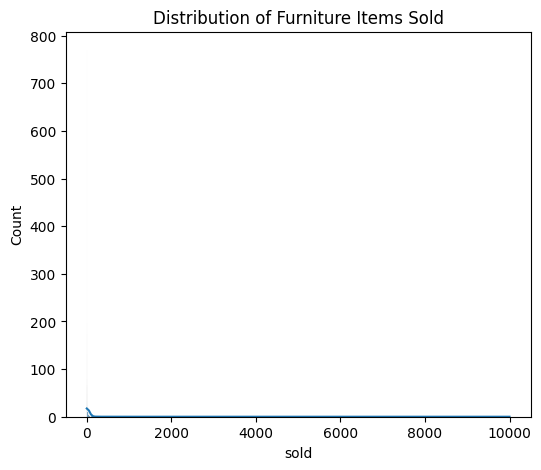

In [32]:
plt.figure(figsize=(6,5))
sns.histplot(df['sold'], kde=True)
plt.title('Distribution of Furniture Items Sold')
plt.show()

## Relationship between originalPrice, price and sold

In [33]:
df[['originalPrice', 'price', 'sold']].head()

,originalPrice,price,sold
0,NaN,$46.79,600
1,NaN,$169.72,0
2,$78.4,$39.46,7
3,NaN,$111.99,0
4,$48.82,$21.37,1


In [34]:
# plt.figure(figsize=(16,12))
# sns.pairplot(df, vars=['originalPrice', 'price', 'sold'], kind='scatter')
# plt.title('Relationship Between Price, Original Price, and Items Sold')
# plt.show()

## Feature engineering: convert productTitle to numerical features using techniques like TF-IDF

In [35]:
df[['productTitle']].head()

,productTitle
0,Dresser For Bedroom With 9 Fabric Drawers Ward...
1,Outdoor Conversation Set 4 Pieces Patio Furnit...
2,Desser For Bedroom With 7 Fabric Drawers Organ...
3,"Modern Accent Boucle Chair,Upholstered Tufted ..."
4,Small Unit Simple Computer Desk Household Wood...


In [36]:
df['productTitle'].isnull().sum()

0

In [37]:
len(df['productTitle'])

2000

In [38]:
len(df['productTitle'].unique())

1793

In [39]:
tfidf = TfidfVectorizer(max_features=100)
tfidf

TfidfVectorizer(max_features=100)

In [40]:
productTitle_tfidf = tfidf.fit_transform(df['productTitle'])
productTitle_tfidf

<2000x100 sparse matrix of type '<class 'numpy.float64'>'
	with 18607 stored elements in Compressed Sparse Row format>

In [41]:
print(len(productTitle_tfidf.toarray()[0]))
print()
print(productTitle_tfidf.toarray()[0])

100

[0.         0.         0.         0.18972075 0.         0.
 0.         0.24358814 0.         0.         0.         0.
 0.         0.2847225  0.34156751 0.         0.         0.
 0.         0.         0.         0.         0.         0.21100989
 0.25479301 0.         0.         0.28200621 0.         0.31677538
 0.2778479  0.16644276 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.26188423 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.33087272 0.
 0.17275281 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.30061082 0.
 0.         0.1201817  0.         0

In [42]:
print(len(tfidf.get_feature_names_out()))
print()
print(tfidf.get_feature_names_out())

100

['adjustable' 'and' 'bed' 'bedroom' 'bedside' 'bench' 'black' 'cabinet'
 'cabinets' 'chair' 'chairs' 'charging' 'chest' 'closet' 'clothes'
 'coffee' 'computer' 'conversation' 'couch' 'cushions' 'desk' 'dining'
 'drawer' 'drawers' 'dresser' 'dressing' 'end' 'fabric' 'folding' 'for'
 'frame' 'furniture' 'gaming' 'garden' 'glass' 'hanging' 'home'
 'household' 'inch' 'kitchen' 'large' 'leather' 'led' 'light' 'lights'
 'living' 'lounge' 'makeup' 'metal' 'mirror' 'modern' 'nightstand' 'of'
 'office' 'organizer' 'ottoman' 'outdoor' 'patio' 'piece' 'pieces'
 'portable' 'power' 'rack' 'rattan' 'room' 'round' 'seat' 'sectional'
 'set' 'sets' 'shaped' 'shelf' 'shelves' 'shoe' 'shoes' 'side' 'simple'
 'small' 'sofa' 'space' 'stand' 'station' 'steel' 'stool' 'storage'
 'swing' 'table' 'tables' 'top' 'tv' 'up' 'upholstered' 'vanity' 'velvet'
 'wardrobe' 'white' 'wicker' 'with' 'wood' 'wooden']


In [43]:
productTitle_tfidf_df = pd.DataFrame(
    productTitle_tfidf.toarray(), 
    columns=tfidf.get_feature_names_out()
)

In [44]:
productTitle_tfidf_df.head()

,adjustable,and,bed,bedroom,bedside,bench,black,cabinet,cabinets,chair,...,up,upholstered,vanity,velvet,wardrobe,white,wicker,with,wood,wooden
0,0.0,0.0,0.0,0.189721,0.0,0.0,0.0,0.243588,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.300611,0.0,0.000000,0.120182,0.0,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.242980,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.300086,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.200469,0.0,0.0,0.0,0.257389,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.126991,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.501093,...,0.0,0.339161,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.551425


In [45]:
productTitle_tfidf_df.shape

(2000, 100)

In [46]:
# productTitle_tfidf_df.columns

In [47]:
df.shape

(2000, 5)

In [48]:
df = pd.concat([df, productTitle_tfidf_df], axis=1)
df.shape

(2000, 105)

In [49]:
df.head(1)

,productTitle,originalPrice,price,sold,tagText,adjustable,and,bed,bedroom,bedside,...,up,upholstered,vanity,velvet,wardrobe,white,wicker,with,wood,wooden
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,99,0.0,0.0,0.0,0.189721,0.0,...,0.0,0.0,0.0,0.0,0.300611,0.0,0.0,0.120182,0.0,0.0


In [50]:
df = df.drop('productTitle', axis=1)
df.shape

(2000, 104)

## Feature engineering: percentage discount

In [51]:
#  Create a new feature to calculate the percentage discount from originalPrice and price

In [52]:
df[['originalPrice', 'price']].head()

,originalPrice,price
0,NaN,$46.79
1,NaN,$169.72
2,$78.4,$39.46
3,NaN,$111.99
4,$48.82,$21.37


In [53]:
df['originalPrice'] = df['originalPrice'].replace('[\\$,]', '', regex=True).astype(float)
df['price'] = df['price'].replace('[\\$,]', '', regex=True).astype(float)

In [54]:
df[['originalPrice', 'price']].head()

,originalPrice,price
0,NaN,46.79
1,NaN,169.72
2,78.40,39.46
3,NaN,111.99
4,48.82,21.37


In [55]:
df['discount_percentage'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100
df.shape

(2000, 105)

In [56]:
df[['originalPrice', 'price', 'discount_percentage']].head(10)

,originalPrice,price,discount_percentage
0,NaN,46.79,NaN
1,NaN,169.72,NaN
2,78.40,39.46,49.668367
3,NaN,111.99,NaN
4,48.82,21.37,56.226956
5,1294.04,123.40,90.463973
6,NaN,198.31,NaN
7,1474.17,734.58,50.169926
8,NaN,43.96,NaN
9,NaN,233.30,NaN


## Check null values

In [84]:
df.shape

(2000, 105)

In [83]:
print(list(df.isnull().sum().index))

['originalPrice', 'price', 'sold', 'tagText', 'adjustable', 'and', 'bed', 'bedroom', 'bedside', 'bench', 'black', 'cabinet', 'cabinets', 'chair', 'chairs', 'charging', 'chest', 'closet', 'clothes', 'coffee', 'computer', 'conversation', 'couch', 'cushions', 'desk', 'dining', 'drawer', 'drawers', 'dresser', 'dressing', 'end', 'fabric', 'folding', 'for', 'frame', 'furniture', 'gaming', 'garden', 'glass', 'hanging', 'home', 'household', 'inch', 'kitchen', 'large', 'leather', 'led', 'light', 'lights', 'living', 'lounge', 'makeup', 'metal', 'mirror', 'modern', 'nightstand', 'of', 'office', 'organizer', 'ottoman', 'outdoor', 'patio', 'piece', 'pieces', 'portable', 'power', 'rack', 'rattan', 'room', 'round', 'seat', 'sectional', 'set', 'sets', 'shaped', 'shelf', 'shelves', 'shoe', 'shoes', 'side', 'simple', 'small', 'sofa', 'space', 'stand', 'station', 'steel', 'stool', 'storage', 'swing', 'table', 'tables', 'top', 'tv', 'up', 'upholstered', 'vanity', 'velvet', 'wardrobe', 'white', 'wicker', '

In [77]:
df.isnull().sum().values

array([1513,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 1513], dtype=int64)

In [86]:
df[['originalPrice', 'discount_percentage']]

,originalPrice,discount_percentage
0,NaN,NaN
1,NaN,NaN
2,78.40,49.668367
3,NaN,NaN
4,48.82,56.226956
...,...,...
1995,NaN,NaN
1996,NaN,NaN
1997,NaN,NaN
1998,NaN,NaN


## Model selection & training

In [57]:
# We will use Linear Regression and Random Forest Regressor as models to predict the number of items sold.

In [ ]:
# df.to_csv('df.csv', index=False)

In [87]:
# Split the dataset into features (X) and target (y)
X = df.drop(['sold','originalPrice','discount_percentage'], axis=1)
y = df['sold']

In [88]:
X.shape

(2000, 102)

In [89]:
y.shape

(2000,)

In [90]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 102)
(400, 102)
(1600,)
(400,)


In [92]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 968 to 1126
Columns: 102 entries, price to wooden
dtypes: float64(101), int8(1)
memory usage: 1.2 MB


In [93]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1860 to 535
Columns: 102 entries, price to wooden
dtypes: float64(101), int8(1)
memory usage: 319.1 KB


In [94]:
y_train.info(verbose=False)

<class 'pandas.core.series.Series'>
Index: 1600 entries, 968 to 1126
dtypes: int64(1)
memory usage: 25.0 KB


In [95]:
y_test.info(verbose=False)

<class 'pandas.core.series.Series'>
Index: 400 entries, 1860 to 535
dtypes: int64(1)
memory usage: 6.2 KB


In [96]:
# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [98]:
# Train models
lr_model.fit(X_train, y_train)

LinearRegression()

In [99]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [74]:
# Model Evaluation

In [100]:
# Predict with Linear Regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [101]:
# Predict with Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [102]:
# Print model evaluation results
print(f'Linear Regression MSE: {mse_lr}, R2: {r2_lr}')
print(f'Random Forest MSE: {mse_rf}, R2: {r2_rf}')

Linear Regression MSE: 13459.794011129872, R2: -1.454590578147835
Random Forest MSE: 19990.77530438128, R2: -2.6456106736425187


* The MSE of 13459.794 indicates a certain level of prediction error.
* The R² of -1.455 is a very strong negative signal. It tells us that our linear regression model is performing substantially worse than a naive model that always predicts the average of the target variable. This suggests that a linear relationship might not be appropriate for our data, or there could be issues with your features or model training.
* The MSE of 19990.775 is even higher than the Linear Regression MSE, suggesting a larger average prediction error for this model.
* The R² of -2.646 is also significantly negative, even worse than the Linear Regression R². This indicates that our Random Forest model is also performing very poorly and is a worse predictor than simply using the mean of the target variable.

After evaluating the models, we can conclude which model performed better and further tune hyperparameters if needed. Random Forest tends to perform better on complex datasets with high variance, while Linear Regression might work well if relationships are linear.